In [1]:
import pickle, copy, json
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.cm as cm
import scipy.stats as sps
from random import shuffle
import itertools

import scipy.linalg as sl
%matplotlib inline
import glob
import hasasia.sensitivity as hsen
import hasasia.sim as hsim
import hasasia.skymap as hsky
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = [5,3]
mpl.rcParams['text.usetex'] = True
from enterprise.pulsar import Pulsar as ePulsar

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#import la_forge.utils as lf_utils
#lf_utils.set_publication_params({'text.usetex':False})
#fig_dir = '/home/baierj/projects/hasasia2/hasasia2_paper/figures'

/opt/homebrew/Caskroom/mambaforge/base/envs/sarahspta/lib/python3.12/site-packages/enterprise/signals/utils.py:13: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import Requirement, resource_filename
libstempo not installed. PINT or libstempo are required to use par and tim files.


In [2]:
import healpy as hp
import astropy.units as u
import astropy.constants as c
from astropy.coordinates import SkyCoord
#import plot #Script originally written by Leo Stein for making pretty sky maps. 

# Setting various healpy quantities and GW source sky positions.
NSIDE = 8
NPIX = hp.nside2npix(NSIDE)
IPIX = np.arange(NPIX)
theta_gw, phi_gw = hp.pix2ang(nside=NSIDE,ipix=IPIX)

Comparative sensitivity curve between NG15 and NG20 for GWB.

In [3]:
#Anjana's simulated v1.1 with GWB - this one is tuned.
ng20_gwb = '/Users/ashokan/osu/sarahspta/data/realization_0/'
pardir = ng20_gwb
timdir = ng20_gwb
pars = sorted(glob.glob(pardir+'*.par'))
tims = sorted(glob.glob(timdir+'*.tim'))

In [4]:
#check number of pulsars
print(len(pars))
print(len(tims))
#check first par and tim files
print(pars[0])
print(tims[0])

80
80
/Users/ashokan/osu/sarahspta/data/realization_0/B1855+09.par
/Users/ashokan/osu/sarahspta/data/realization_0/B1855+09.tim


In [5]:
#make enterprise pulsars
ePsrs = []
for par,tim in zip(pars,tims):
    # if 'J1802' in par:
    #     continue #this pulsar has some issue
    #else:
    ePsr = ePulsar(par, tim,  ephem='DE440')
    ePsrs.append(ePsr)
    print('\rPSR {0} complete'.format(ePsr.name),end='',flush=True)

2025-10-08 09:56:59.926 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:00.126 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:00.128 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:00.137 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:00.137 | DEBUG    | pint.observatory:_load_gps_clock:108 - Loading global GPS clock file
2025-10-08 09:57:00.335 | DEBUG    | pint.observatory.clock_file:__init__:812 - Global clock file gps2utc.clk saving kwargs={'bogus_last_correction': False, 'valid_beyond_ends': False}
2025-10-08 09:57:00.351 | DEBUG    | pint.observatory.clock_file:read_tempo2_clock_file:463 - Loading TEMPO2-format observatory clock correction file gps2utc.clk (/Users/ashokan/.astropy/cache/download/url/d3c81b5766f4bfb84e65504c8a453085/conten

PSR B1855+09 complete

2025-10-08 09:57:02.359 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:02.588 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:02.592 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:02.598 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:02.600 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:02.600 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:02.650 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:02.651 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR B1937+21 complete

2025-10-08 09:57:03.627 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:03.701 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:03.703 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:03.708 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:03.709 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:03.709 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:03.744 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:03.745 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR B1953+29 complete

2025-10-08 09:57:04.868 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:04.991 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:04.993 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:04.999 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:05.000 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:05.001 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:05.050 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:05.051 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J0023+0923 complete

2025-10-08 09:57:06.581 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:06.749 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:06.753 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:06.771 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:06.772 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:06.773 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:06.879 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:06.879 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J0030+0451 complete

2025-10-08 09:57:07.929 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:07.999 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:08.003 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:08.017 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:08.019 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:08.020 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:08.117 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:08.118 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:08.140 | DEBUG    | pint.toa:get_TOAs:310 - Planet P

PSR J0102+4839 complete

2025-10-08 09:57:09.345 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:09.385 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:09.386 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:09.391 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:09.393 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:09.394 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:09.421 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:09.423 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correc

PSR J0125-2327 complete

2025-10-08 09:57:10.614 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:10.640 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:10.641 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:10.644 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:10.645 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:10.647 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:10.656 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:10.664 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J0154+1833 complete

2025-10-08 09:57:11.524 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:11.627 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:11.630 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:11.653 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:11.655 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:11.656 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:11.784 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:11.785 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:11.829 | DEBUG    | pint.toa:get_TOAs:310 - Planet P

PSR J0218+4232 complete

2025-10-08 09:57:12.896 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:13.013 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:13.016 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:13.034 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:13.035 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:13.036 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:13.132 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:13.134 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J0340+4130 complete

2025-10-08 09:57:13.998 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:14.147 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:14.149 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:14.152 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:14.152 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:14.153 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:14.178 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:14.179 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J0406+3039 complete

2025-10-08 09:57:15.241 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:15.255 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:15.256 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:15.259 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:15.260 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:15.261 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='vla'.
2025-10-08 09:57:15.278 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:15.278 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:15.285 | DEBUG    | pint.toa:get_TOAs:3

PSR J0437-4715 complete

2025-10-08 09:57:16.100 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:16.220 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:16.222 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:16.225 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:16.226 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:16.227 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:16.256 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:16.257 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J0509+0856 complete

2025-10-08 09:57:17.441 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:17.452 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:17.454 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:17.456 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:17.457 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:17.458 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:17.467 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:17.468 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:17.471 | DEBUG    | pint.toa:get_TO

PSR J0557+1551 complete

2025-10-08 09:57:18.180 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:18.203 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:18.204 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:18.206 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:18.207 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:18.208 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:18.213 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:18.214 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J0605+3757 complete

2025-10-08 09:57:19.070 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:19.093 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:19.094 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:19.099 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:19.100 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:19.101 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:19.127 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:19.128 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:19.137 | DEBUG    | pint.toa:get_TOAs:3

PSR J0610-2100 complete

2025-10-08 09:57:19.917 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:20.068 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:20.073 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:20.104 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:20.105 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:20.106 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:20.304 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:20.305 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J0613-0200 complete

2025-10-08 09:57:21.681 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:21.707 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:21.708 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:21.712 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:21.713 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:21.714 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:21.733 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:21.734 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:21.741 | DEBUG    | pint.toa:get_TOAs:3

PSR J0614-3329 complete

2025-10-08 09:57:22.656 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:22.670 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:22.671 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:22.674 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:22.675 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:22.676 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:22.686 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:22.687 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:22.695 | DEBUG    | pint.toa:get_TO

PSR J0621+2514 complete

2025-10-08 09:57:23.467 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:23.603 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:23.606 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:23.627 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:23.628 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:23.629 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:23.758 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:23.759 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J0636+5128 complete

2025-10-08 09:57:25.189 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:25.308 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:25.311 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:25.331 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:25.332 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:25.333 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:25.457 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:25.459 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J0645+5158 complete

2025-10-08 09:57:26.182 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:26.193 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:26.194 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:26.199 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:26.200 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:26.201 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:26.215 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:26.216 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:26.220 | DEBUG    | pint.toa:get_TO

PSR J0709+0458 complete

2025-10-08 09:57:26.921 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:26.977 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:26.979 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:26.981 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:26.982 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:26.982 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:26.998 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:26.999 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J0732+2314 complete

2025-10-08 09:57:27.903 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:28.107 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:28.112 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:28.134 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:28.136 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:28.137 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:28.267 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:28.269 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J0740+6620 complete

2025-10-08 09:57:29.331 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:29.442 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:29.444 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:29.447 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:29.447 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:29.448 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:29.486 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:29.488 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J0751+1807 complete

2025-10-08 09:57:30.764 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:30.800 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:30.801 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:30.809 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:30.810 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:30.811 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:30.850 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:30.850 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:30.863 | DEBUG    | pint.toa:get_TOAs:3

PSR J0931-1902 complete

2025-10-08 09:57:31.400 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:31.579 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:31.582 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:31.611 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:31.612 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:31.613 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:31.784 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:31.785 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J1012+5307 complete

2025-10-08 09:57:33.137 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:33.160 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:33.162 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:33.169 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:33.170 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:33.171 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:33.186 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:33.187 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:33.193 | DEBUG    | pint.toa:get_TOAs:3

PSR J1012-4235 complete

2025-10-08 09:57:34.154 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:34.256 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:34.258 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:34.261 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:34.263 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:34.263 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:34.294 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:34.295 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1022+1001 complete

2025-10-08 09:57:35.766 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:35.840 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:35.842 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:35.849 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:35.850 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:35.850 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:35.890 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:35.891 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J1024-0719 complete

2025-10-08 09:57:36.559 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:36.671 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:36.674 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:36.694 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:36.696 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:36.697 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:36.816 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:36.817 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J1125+7819 complete

2025-10-08 09:57:37.937 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:37.949 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:37.950 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:37.953 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:37.954 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:37.954 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:37.966 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:37.967 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:37.974 | DEBUG    | pint.toa:get_TO

PSR J1312+0051 complete

2025-10-08 09:57:38.529 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:38.577 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:38.578 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:38.582 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:38.583 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:38.584 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:38.610 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:38.611 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1453+1902 complete

2025-10-08 09:57:39.283 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:39.329 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:39.331 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:39.341 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:39.342 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:39.343 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:39.400 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:39.403 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:39.429 | DEBUG    | pint.toa:get_TOAs:3

PSR J1455-3330 complete

2025-10-08 09:57:40.385 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:40.460 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:40.462 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:40.472 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:40.472 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:40.473 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:40.530 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:40.531 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correc

PSR J1600-3053 complete

2025-10-08 09:57:41.541 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:41.594 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:41.597 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:41.613 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:41.614 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:41.614 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:41.698 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:41.699 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:41.718 | DEBUG    | pint.toa:get_TOAs:3

PSR J1614-2230 complete

2025-10-08 09:57:42.589 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:42.660 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:42.662 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:42.675 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:42.675 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:42.676 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:42.761 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:42.762 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J1630+3734 complete

2025-10-08 09:57:43.876 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:44.075 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:44.080 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:44.100 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:44.101 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:44.102 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:44.227 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:44.228 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1640+2224 complete

2025-10-08 09:57:45.515 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:45.637 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:45.640 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:45.669 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:45.669 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:45.670 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:45.796 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:45.798 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J1643-1224 complete

2025-10-08 09:57:47.028 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:47.045 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:47.046 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:47.050 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:47.051 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:47.051 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:47.071 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:47.072 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correc

PSR J1705-1903 complete

2025-10-08 09:57:48.365 | DEBUG    | pint.models.binary_ddk:validate:211 - Validating DDK model in ECL coordinates
2025-10-08 09:57:48.365 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:48.557 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:48.561 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:48.581 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:48.583 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:48.585 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:48.669 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
20

PSR J1713+0747 complete

2025-10-08 09:57:50.472 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:50.503 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:50.504 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:50.509 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:50.510 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:50.511 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:50.536 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:50.536 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:50.545 | DEBUG    | pint.toa:get_TOAs:3

PSR J1719-1438 complete

2025-10-08 09:57:51.253 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:51.281 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:51.282 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:51.288 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:51.289 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:51.290 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:51.319 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:51.320 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:51.329 | DEBUG    | pint.toa:get_TOAs:3

PSR J1730-2304 complete

2025-10-08 09:57:51.826 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:51.874 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:51.876 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:51.880 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:51.881 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:51.882 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:51.921 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:51.921 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1738+0333 complete

2025-10-08 09:57:52.993 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:53.120 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:53.123 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:53.129 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:53.130 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:53.131 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:53.181 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:53.182 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1741+1351 complete

2025-10-08 09:57:54.369 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:54.540 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:54.543 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:54.564 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:54.565 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:54.566 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:57:54.682 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:54.683 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J1744-1134 complete

2025-10-08 09:57:55.433 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:55.449 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:55.450 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:55.452 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:55.454 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:55.454 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:55.468 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:55.469 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1745+1017 complete

2025-10-08 09:57:56.647 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:56.710 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:56.712 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:56.719 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:56.720 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:56.721 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:56.760 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:56.760 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correc

PSR J1747-4036 complete

2025-10-08 09:57:57.379 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:57.402 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:57.403 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:57.408 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:57.409 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:57.409 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:57.431 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:57:57.431 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:57:57.439 | DEBUG    | pint.toa:get_TOAs:3

PSR J1751-2857 complete

2025-10-08 09:57:58.211 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:58.232 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:58.234 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:58.238 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:58.239 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:58.240 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:57:58.263 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:58.264 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correc

PSR J1802-2124 complete

2025-10-08 09:57:59.208 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:57:59.286 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:57:59.290 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:57:59.291 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:59.292 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:57:59.292 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:57:59.305 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:57:59.306 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1803+1358 complete

2025-10-08 09:58:00.243 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:00.267 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:00.268 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:00.272 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:00.273 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:00.274 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:58:00.300 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:58:00.300 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:58:00.311 | DEBUG    | pint.toa:get_TOAs:3

PSR J1811-2405 complete

2025-10-08 09:58:01.129 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:01.206 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:01.209 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:01.220 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:01.221 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:01.222 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:58:01.281 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:58:01.282 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:58:01.295 | DEBUG    | pint.toa:get_TOAs:3

PSR J1832-0836 complete

2025-10-08 09:58:01.778 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:01.819 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:01.820 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:01.829 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:01.830 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:01.832 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:58:01.890 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:58:01.891 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:58:01.910 | DEBUG    | pint.toa:get_TOAs:3

PSR J1843-1113 complete

2025-10-08 09:58:02.456 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:02.591 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:02.593 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:02.598 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:02.599 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:02.600 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:02.635 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:02.636 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1853+1303 complete

2025-10-08 09:58:03.992 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:04.047 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:04.049 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:04.054 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:04.055 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:04.056 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:04.103 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:04.104 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1903+0327 complete

2025-10-08 09:58:04.988 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:05.080 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:05.083 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:05.105 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:05.106 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:05.107 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:58:05.209 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:05.210 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correc

PSR J1909-3744 complete

2025-10-08 09:58:06.262 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:06.291 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:06.293 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:06.298 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:06.299 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:06.299 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:06.337 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:06.338 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1910+1256 complete

2025-10-08 09:58:07.345 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:07.370 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:07.373 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:07.377 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:07.378 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:07.379 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:07.399 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:07.401 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1911+1347 complete

2025-10-08 09:58:07.949 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:07.972 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:07.973 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:07.976 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:07.977 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:07.978 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:58:07.992 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:58:07.993 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:58:07.998 | DEBUG    | pint.toa:get_TOAs:3

PSR J1911-1114 complete

2025-10-08 09:58:08.643 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:08.722 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:08.724 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:08.730 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:08.731 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:08.731 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:58:08.770 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:08.772 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J1918-0642 complete

2025-10-08 09:58:09.870 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:09.916 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:09.918 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:09.923 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:09.924 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:09.925 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:09.955 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:09.956 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1923+2515 complete

2025-10-08 09:58:10.776 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:10.892 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:10.894 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:10.901 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:10.904 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:10.904 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:10.944 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:10.945 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1944+0907 complete

2025-10-08 09:58:11.668 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:11.706 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:11.707 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:11.711 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:11.712 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:11.713 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:11.733 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:11.735 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J1946+3417 complete

2025-10-08 09:58:12.622 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:12.666 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:12.669 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:12.681 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:12.682 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:12.683 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:58:12.736 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:58:12.737 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:58:12.756 | DEBUG    | pint.toa:get_TOAs:3

PSR J2010-1323 complete

2025-10-08 09:58:13.272 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:13.296 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:13.297 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:13.301 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:13.302 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:13.303 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:13.327 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:13.328 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J2017+0603 complete

2025-10-08 09:58:14.144 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:14.256 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:14.259 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:14.262 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:14.263 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:14.264 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:14.286 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:14.286 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J2022+2534 complete

2025-10-08 09:58:15.574 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:15.679 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:15.682 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:15.687 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:15.688 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:15.689 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:15.730 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:15.731 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J2033+1734 complete

2025-10-08 09:58:17.016 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:17.037 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:17.038 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:17.042 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:17.043 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:17.044 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:58:17.065 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:58:17.066 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:58:17.073 | DEBUG    | pint.toa:get_TOAs:3

PSR J2039-3616 complete

2025-10-08 09:58:17.745 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:17.843 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:17.846 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:17.858 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:17.859 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:17.860 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:17.929 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:17.930 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J2043+1711 complete

2025-10-08 09:58:19.127 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:19.242 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:19.244 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:19.249 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:19.250 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:19.251 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='gbt'.
2025-10-08 09:58:19.278 | DEBUG    | pint.toa:compute_TDBs:2278 - Computing TDB columns.
2025-10-08 09:58:19.278 | DEBUG    | pint.toa:compute_TDBs:2299 - Using EPHEM = DE440 for TDB calculation.
2025-10-08 09:58:19.288 | DEBUG    | pint.toa:get_TOAs:3

PSR J2124-3358 complete

2025-10-08 09:58:19.796 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:19.934 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:19.937 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:19.954 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:19.955 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:19.956 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:58:20.054 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:20.055 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J2145-0750 complete

2025-10-08 09:58:21.147 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:21.174 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:21.178 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:21.186 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:21.190 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:21.192 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:58:21.209 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:21.212 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J2150-0326 complete

2025-10-08 09:58:22.053 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:22.160 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:22.164 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:22.169 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:22.171 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:22.171 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:22.215 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:22.216 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J2214+3000 complete

2025-10-08 09:58:23.515 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:23.644 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:23.646 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:23.651 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:23.653 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:23.653 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:23.702 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:23.703 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J2229+2643 complete

2025-10-08 09:58:24.910 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:24.959 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:24.961 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:24.965 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:24.966 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:24.967 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:24.990 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:24.991 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J2234+0611 complete

2025-10-08 09:58:26.029 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:26.101 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:26.104 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:26.109 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:26.110 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:26.111 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:26.143 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:26.145 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J2234+0944 complete

2025-10-08 09:58:27.316 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:27.421 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:27.423 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:27.441 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:27.442 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:27.443 | INFO     | pint.observatory.topo_obs:clock_corrections:354 - Observatory chime requires no clock corrections.
2025-10-08 09:58:27.558 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:27.559 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)

PSR J2302+4442 complete

2025-10-08 09:58:28.559 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:28.706 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:28.709 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:28.725 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:28.726 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:28.727 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:28.827 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:28.832 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J2317+1439 complete

2025-10-08 09:58:30.048 | DEBUG    | pint.toa:get_TOAs:211 - Using CLOCK = BIPM2023 from the given model
2025-10-08 09:58:30.102 | DEBUG    | pint.toa:__init__:1377 - No pulse number flags found in the TOAs
2025-10-08 09:58:30.104 | DEBUG    | pint.toa:apply_clock_corrections:2232 - Applying clock corrections (include_bipm = True)
2025-10-08 09:58:30.109 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:30.110 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock correction (~27 us)
2025-10-08 09:58:30.110 | INFO     | pint.observatory.topo_obs:clock_corrections:340 - Applying observatory clock corrections for observatory='arecibo'.
2025-10-08 09:58:30.138 | INFO     | pint.observatory:gps_correction:230 - Applying GPS to UTC clock correction (~few nanoseconds)
2025-10-08 09:58:30.139 | INFO     | pint.observatory:bipm_correction:245 - Applying TT(TAI) to TT(BIPM2023) clock co

PSR J2322+2057 complete

In [6]:
#make a noise dict that  works 

#sarah's noise file
sarahs_noise_file = '/Users/ashokan/osu/sarahspta/20yr_noisedict_rn+curn-bpl.json'
import json
with open(sarahs_noise_file,'r') as f:
    noise = json.load(f)
rn_psrs = noise

#use the noise dict from Nihan
#Nihan's noise dict for 15yr 
nihans_dict = '/Users/ashokan/osu/sarahspta/15yr_v1_fl_fwn_dict.json'
with open(nihans_dict,'r') as f:
    nihans_noise = json.load(f)

#NG20 real noise dict
ng20_noise_dict = '/Users/ashokan/osu/sarahspta/ng20_v1p1_dmx_noise_dict.json'
#from https://drive.google.com/drive/folders/1GQXnpyRglqPHwgQs6vE8VK-6VoL9WbSj
with open(ng20_noise_dict,'r') as f:
    ng20_noise_real = json.load(f)

#make a new noise dict with only chime and vegas pulsars
chime_vegas_noise_dict = {}
for k, v in ng20_noise_real.items():
    new_key = k.replace("t2equad", "equad")
    if "CHIME" in k or "YUPPI" in k or "VEGAS" in k or "J0125-2327" in k or "J0154+1833" in k or "J0614-3329" in k or "J0621+2514" in k or "J0732+2314" in k or "J0751+1807" in k or "J1022+1001" in k or "J1803+1358" in k or "J2022+2534" in k or "J2039-3616" in k or "J2150-0326" in k:
        print(k)
        chime_vegas_noise_dict[new_key] = v

#update nihans noise dict with chime and vegas pulsars from ng20
nihans_noise.update(chime_vegas_noise_dict)

#rn_dict_file = '/Users/vigeland/Documents/Research/NANOGrav/nanograv_20yr_gwb/20yr_noisedict_rn+curn-bpl.json'
rn_dict_file = '/Users/ashokan/osu/sarahspta/20yr_noisedict_rn+curn-bpl.json'
with open(rn_dict_file, 'r') as f:
    rn_dict = json.load(f)
print('Noise dicts loaded!')

B1855+09_CHIME_efac
B1855+09_CHIME_log10_ecorr
B1855+09_CHIME_log10_t2equad
B1855+09_Rcvr1_2_VEGAS_efac
B1855+09_Rcvr1_2_VEGAS_log10_ecorr
B1855+09_Rcvr1_2_VEGAS_log10_t2equad
B1937+21_3GHz_YUPPI_efac
B1937+21_3GHz_YUPPI_log10_ecorr
B1937+21_3GHz_YUPPI_log10_t2equad
B1937+21_CHIME_efac
B1937+21_CHIME_log10_ecorr
B1937+21_CHIME_log10_t2equad
B1937+21_Rcvr1_2_VEGAS_efac
B1937+21_Rcvr1_2_VEGAS_log10_ecorr
B1937+21_Rcvr1_2_VEGAS_log10_t2equad
B1937+21_Rcvr_800_VEGAS_efac
B1937+21_Rcvr_800_VEGAS_log10_ecorr
B1937+21_Rcvr_800_VEGAS_log10_t2equad
B1953+29_CHIME_efac
B1953+29_CHIME_log10_ecorr
B1953+29_CHIME_log10_t2equad
J0023+0923_CHIME_efac
J0023+0923_CHIME_log10_ecorr
J0023+0923_CHIME_log10_t2equad
J0023+0923_Rcvr1_2_VEGAS_efac
J0023+0923_Rcvr1_2_VEGAS_log10_ecorr
J0023+0923_Rcvr1_2_VEGAS_log10_t2equad
J0030+0451_CHIME_efac
J0030+0451_CHIME_log10_ecorr
J0030+0451_CHIME_log10_t2equad
J0030+0451_Rcvr1_2_VEGAS_efac
J0030+0451_Rcvr1_2_VEGAS_log10_ecorr
J0030+0451_Rcvr1_2_VEGAS_log10_t2equad
J0

In [7]:
def make_corr(psr,noise):
    N = psr.toaerrs.size
    corr = np.zeros((N,N))
    _, _, fl, _, bi = hsen.quantize_fast(psr.toas,psr.toaerrs,
                                         flags=psr.flags['f'],dt=1)
    keys = [ky for ky in noise.keys() if psr.name in ky]
    backends = np.unique(psr.flags['f'])
    sigma_sqr = np.zeros(N)
    ecorrs = np.zeros_like(fl,dtype=float)
    for be in backends:
        mask = np.where(psr.flags['f']==be)
        key_ef = '{0}_{1}_{2}'.format(psr.name,be,'efac')
        key_eq = '{0}_{1}_log10_{2}'.format(psr.name,be,'equad')
        key_ec = '{0}_{1}_log10_{2}'.format(psr.name,be,'ecorr')
        sigma_sqr[mask] = (noise[key_ef]**2 * ((psr.toaerrs[mask]**2)
                           + (10**noise[key_eq])**2))#+(10**noise[key_ec])**2)
        mask_ec = np.where(fl==be)
        key_ec = '{0}_{1}_log10_{2}'.format(psr.name,be,'ecorr')
        ecorrs[mask_ec] = np.ones_like(mask_ec) * (10**noise[key_ec])
    j = [ecorrs[ii]**2*np.ones((len(bucket),len(bucket)))
         for ii, bucket in enumerate(bi)]

    J = sl.block_diag(*j)
    corr = np.diag(sigma_sqr) + J
    return corr

In [8]:
#make correlation matrix with only toaerrs for Sarah's data
def make_corr_our(psr):
    sigma_sqrt = psr.toaerrs**2
    corr = np.diag(sigma_sqrt)
    return corr


In [9]:
Tspan = hsen.get_Tspan(ePsrs)
fyr = 1/(365.25*24*3600)
freqs = np.logspace(np.log10(1/(5*Tspan)),np.log10(2e-7),600)

In [10]:
#make hasasia pulsars from enterprise pulsars.
A_gwb, gamma_gwb = 6.4e-15, 3.2 # median values from detection paper
psrs = []
thin = 1
for ePsr in ePsrs:
    corr = make_corr_our(ePsr)[::thin,::thin]
    nihans_corr = make_corr(ePsr,nihans_noise)
    plaw = hsen.red_noise_powerlaw(A=A_gwb, gamma=gamma_gwb, freqs=freqs)
    if ePsr.name in rn_psrs.keys():
        Amp, gam = rn_psrs[ePsr.name]
        plaw += hsen.red_noise_powerlaw(A=10**Amp, gamma=gam, freqs=freqs)

    nihans_corr += hsen.corr_from_psd(freqs=freqs, psd=plaw,
                               toas=ePsr.toas[::thin])
    psr = hsen.Pulsar(toas=ePsr.toas[::thin],
                      toaerrs=ePsr.toaerrs[::thin],
                      phi=ePsr.phi,theta=ePsr.theta,
                      N=nihans_corr, designmatrix=ePsr.Mmat[::thin,:])
    psr.name = ePsr.name
    psrs.append(psr)
    del ePsr
    print('\rPSR {0} complete'.format(psr.name),end='',flush=True)

PSR J2322+2057 complete

In [11]:
#make spectra
specs = []
for p in psrs:
    sp = hsen.Spectrum(p, freqs=freqs,amp_gw=None, gamma_gw=None)
    _ = sp.NcalInv
    specs.append(sp)
    print('\rPSR {0} complete'.format(p.name),end='',flush=True)
ng20_sarah_nihans_wn = hsen.GWBSensitivityCurve(specs)

PSR J2322+2057 complete

In [12]:
#SNR of full NG20 data now
alpha_gwb = (3. - gamma_gwb) / 2.
S_h = hsen.S_h(A=A_gwb, alpha=alpha_gwb, freqs=freqs)
snr_20 = ng20_sarah_nihans_wn.SNR(S_h)
print(snr_20)

10.206125060138337


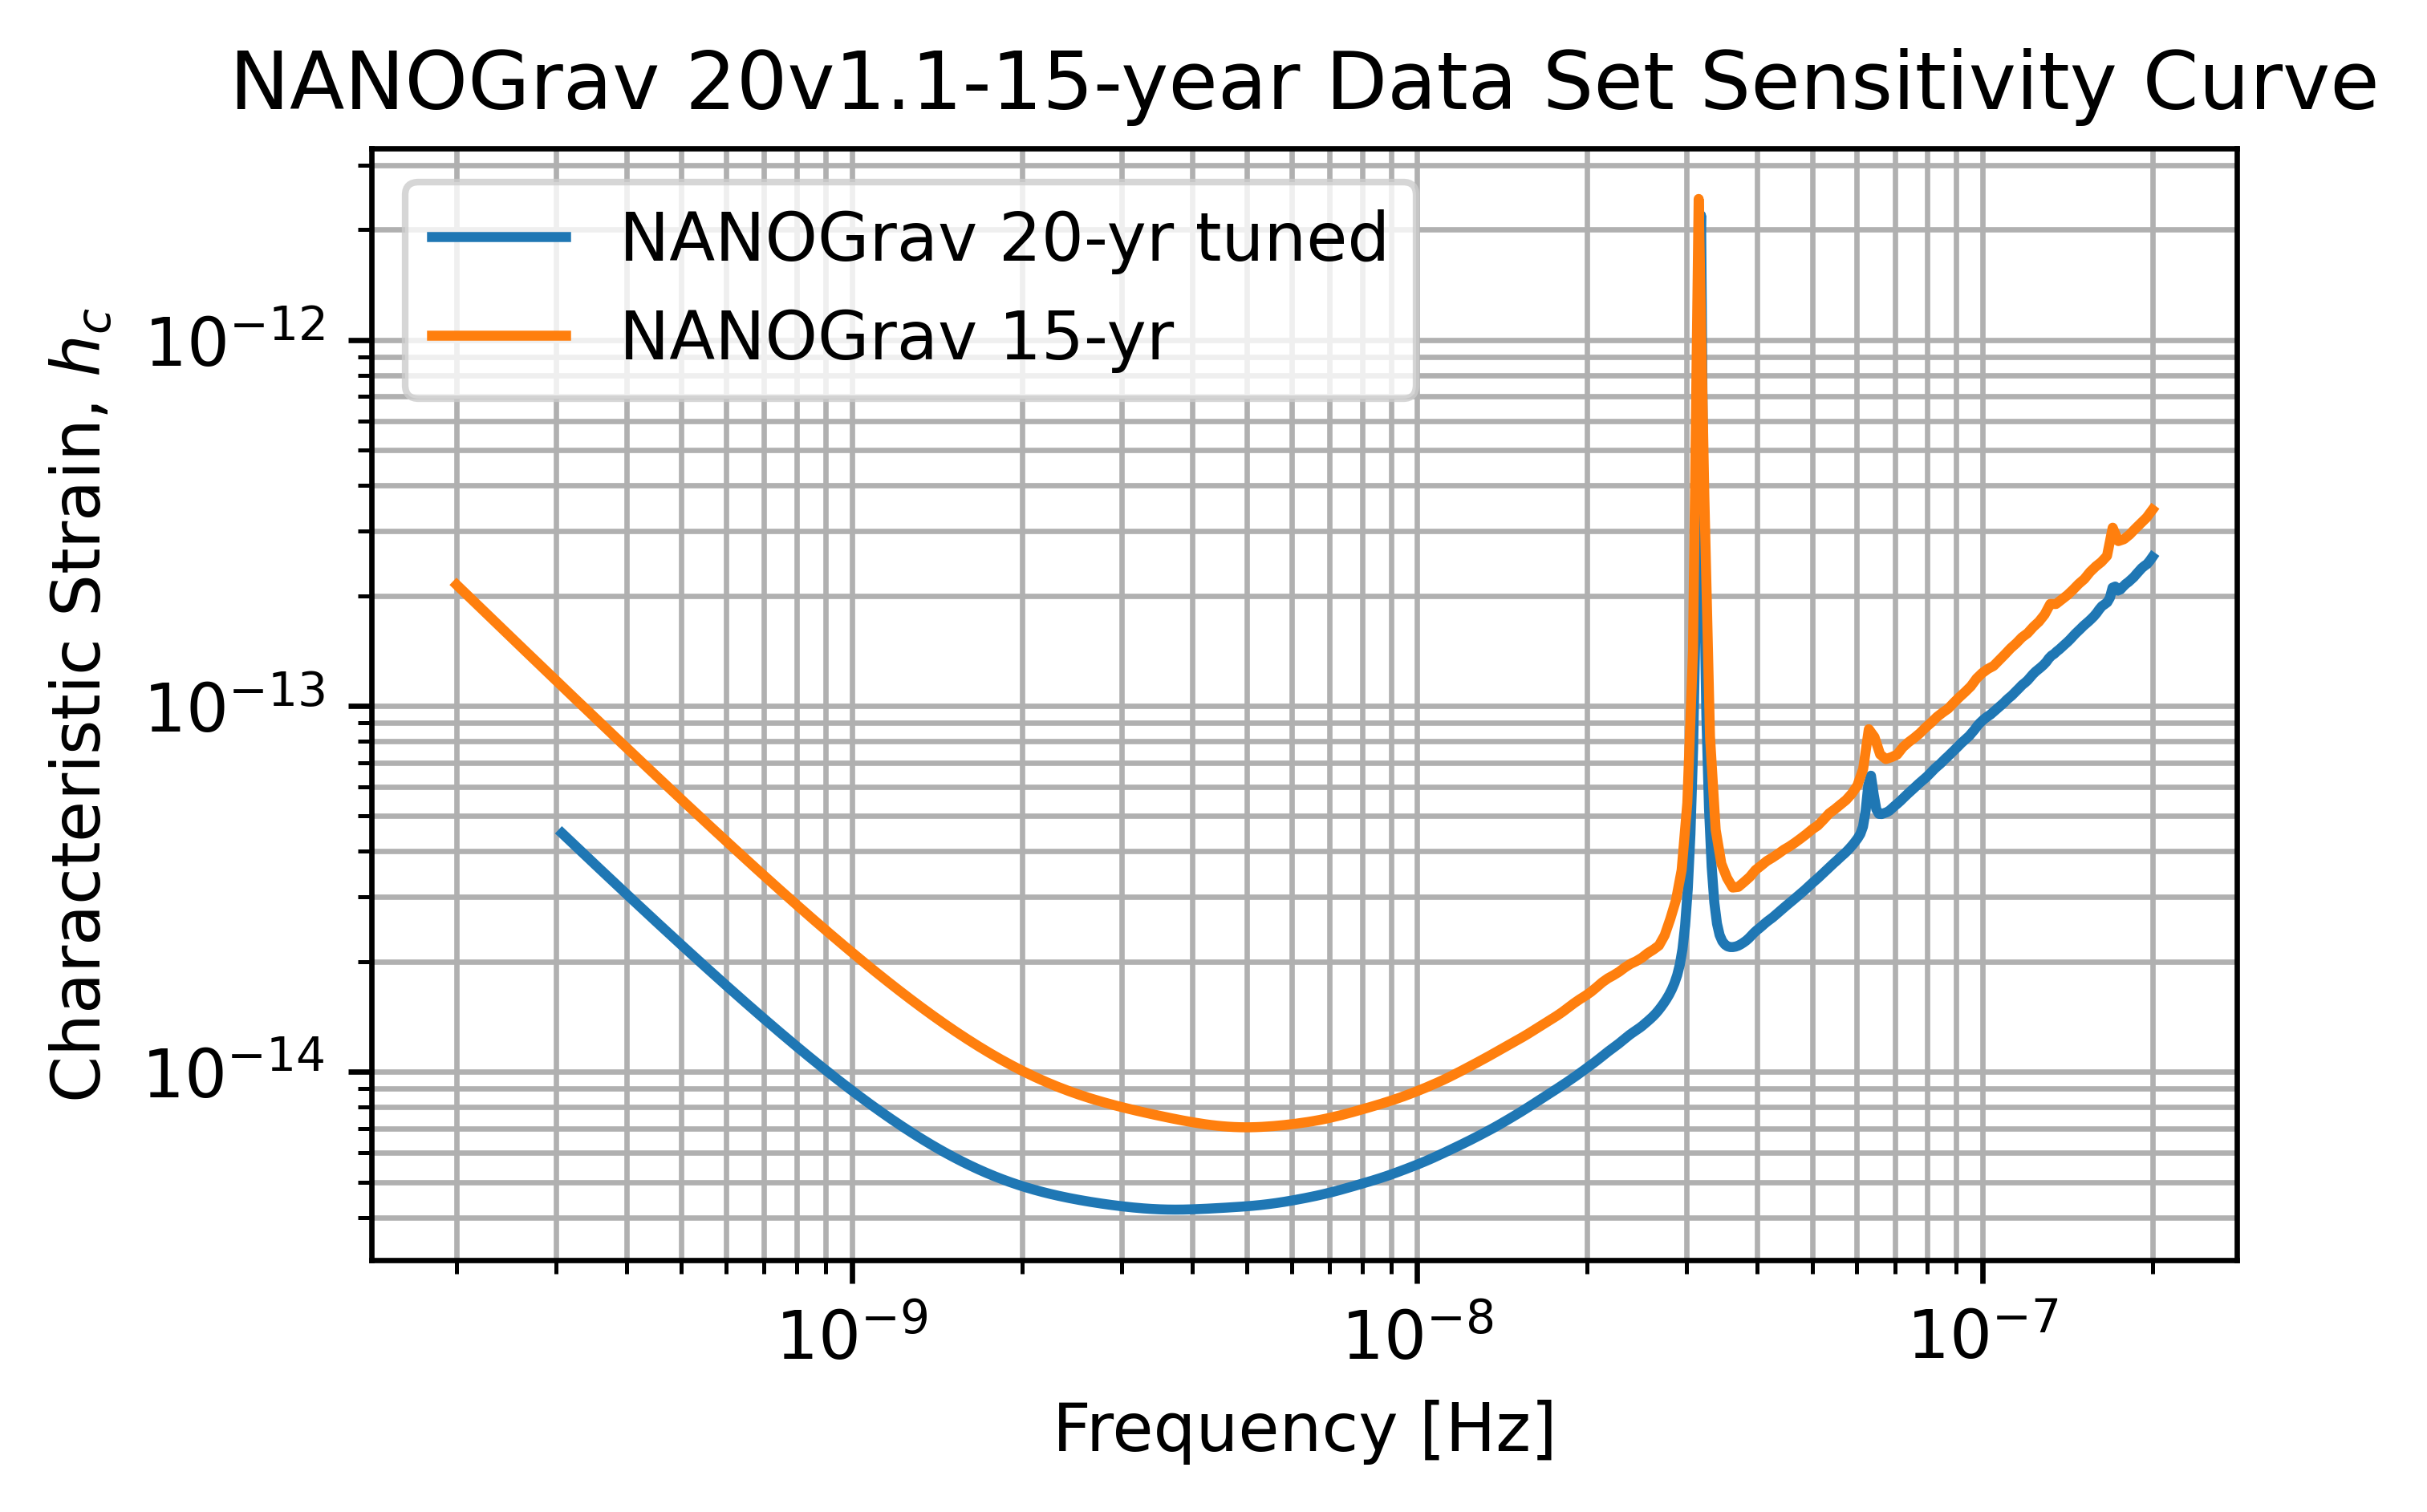

In [13]:
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = False
#plot against original NG15 curve
ng15_pkl_gwb = '/Users/ashokan/osu/sarahspta/ng15yr_v1p1_pint_logf_m2a_red_noise_vg_gwbsc.has' 
with open (ng15_pkl_gwb,'rb') as f:
    ng15_sc_gwb = pickle.load(f)

plt.loglog(ng20_sarah_nihans_wn.freqs,ng20_sarah_nihans_wn.h_c,label='NANOGrav 20-yr tuned')
plt.loglog(ng15_sc_gwb.freqs,ng15_sc_gwb.h_c,label='NANOGrav 15-yr')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Characteristic Strain, $h_c$')
plt.title('NANOGrav 20v1.1-15-year Data Set Sensitivity Curve')
plt.grid(which='both')
# plt.ylim(1e-15,9e-12)
plt.legend()
plt.show()

In [15]:
#lets make its 15year slice

In [16]:
def get_sliced_spectra(psrs, 
                       start_mjd=1,
                       end_mjd = None,
                       ):
    """
    Parameters 
    ----------
    
    psrs : list of enterprise.Pulsar or list of hasasia.Pulsar objects
        List of enterprise/hasasia Pulsar objects
        
    cutoff : float
        MJD cutoff for the calculation
    
    sigma_correction : ?
        ???
    """
    psrs_cut = []
    psrs_copy = copy.deepcopy(psrs)
    for idx, psr in enumerate(psrs_copy):
        # filter the data around to the appropriate slice
        #print("N_toa = ", len(psr.toas))
        psr.filter_data(start_time=start_mjd, end_time=end_mjd)
        #print("after filter = ", len(psr.toas)) 
        # If there are no TOAs remaining, or the time span of the pulsar is <3 cut.
        if (psr.toas.size == 0) or (hsen.get_Tspan([psr]) < 3*365.25*24*3600):
            #idxs.append(idx)
           pass
        else:
            psrs_cut.append(psr)
    timespan = hsen.get_Tspan(psrs_cut)
    spectra = []
    for idx, p in enumerate(psrs_cut):
        sp = hsen.Spectrum(p, freqs=freqs,amp_gw=None, gamma_gw=None)
        sp.name = p.name
        _ = sp.NcalInv
        #print(f"psr spectra {idx} is done")
        spectra.append(sp)
    print(f"PTA spectrum with {len(spectra)} psrs created.")
    return spectra

In [17]:
end_mjd = 59033
psr_spectra = get_sliced_spectra(psrs, 
                       start_mjd=1,
                       end_mjd = end_mjd,
                       )

PTA spectrum with 67 psrs created.


In [18]:
#SNR of sliced data
sliced_GWBSC = hsen.GWBSensitivityCurve(spectra=psr_spectra, orf='hd', autocorr=False)
S_h = hsen.S_h(A=A_gwb, alpha=alpha_gwb, freqs=freqs)
sliced_SNR = sliced_GWBSC.SNR(S_h)
print(sliced_SNR)

6.519266937097235


Hmmm that's > 5. What about data without GWB?